# ---------------------------
# RUN NOTEBOOK TEMPLATE
# ---------------------------


In [1]:
# Import
from model import MultiTierModel
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# ---------------------------
# Define assumptions
# ---------------------------
assumptions = {
    "n_suppliers":3,
    "n_plants":3,
    "n_dcs":2,
    "n_retailers":5,
    "base_stock":{"supplier":100,"plant":80,"dc":60,"retailer":30},
    "capacity":{"supplier":20,"plant":15,"dc":10,"retailer":0},
    "lead_time":{"supplier":1,"plant":2,"dc":1,"retailer":1},
    "disruption_prob":0.05,
    "capacity_loss_frac":0.5,
    "recovery_duration":5
}


In [ ]:

# ---------------------------
# 3 Create model
# ---------------------------
model = MultiTierModel(assumptions=assumptions, seed=42, dual_sourcing=True)

In [ ]:
# ---------------------------
# 4 Run simulation
# ---------------------------
n_steps = 50
fill_rates = []
bullwhips = []
total_costs = []

for step in range(n_steps):
    model.step()
    fill_rates.append(model.compute_fill_rate())
    bullwhips.append(model.compute_bullwhip())
    total_costs.append(model.compute_total_cost())

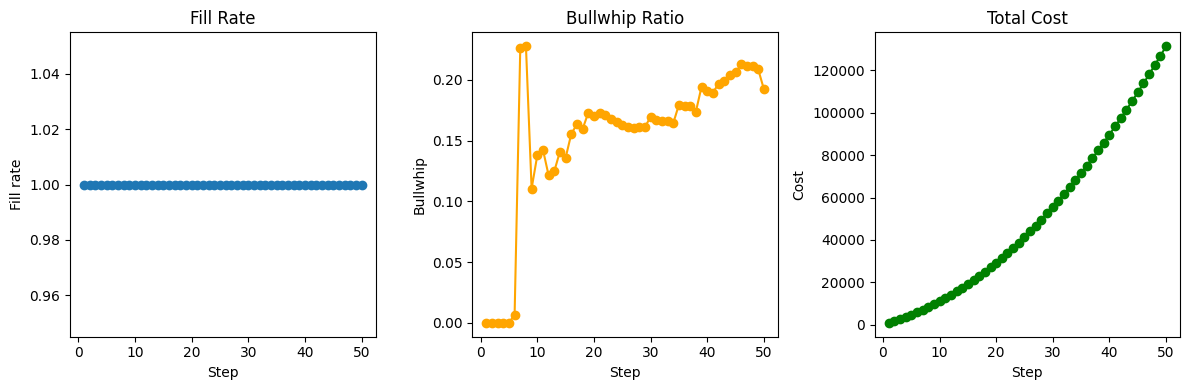

Fill rate final: 1.0
Total cost final: 131481
Bullwhip ratio final: 0.1923725817314608
Time to recover (baseline 0.9): 50


In [ ]:

# ---------------------------
# 5 Create results dataframe
# ---------------------------
results = pd.DataFrame({
    "step": range(1, n_steps+1),
    "fill_rate": fill_rates,
    "bullwhip": bullwhips,
    "total_cost": total_costs
})

results.head()

# ---------------------------
# 6 Plot KPI
# ---------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(results["step"], results["fill_rate"], marker='o')
plt.title("Fill Rate")
plt.xlabel("Step"); plt.ylabel("Fill rate")

plt.subplot(1,3,2)
plt.plot(results["step"], results["bullwhip"], marker='o', color='orange')
plt.title("Bullwhip Ratio")
plt.xlabel("Step"); plt.ylabel("Bullwhip")

plt.subplot(1,3,3)
plt.plot(results["step"], results["total_cost"], marker='o', color='green')
plt.title("Total Cost")
plt.xlabel("Step"); plt.ylabel("Cost")

plt.tight_layout()
plt.show()

# ---------------------------
# 7 Quick summary at last step
# ---------------------------
print("Fill rate final:", results["fill_rate"].iloc[-1])
print("Total cost final:", results["total_cost"].iloc[-1])
print("Bullwhip ratio final:", results["bullwhip"].iloc[-1])
print("Time to recover (baseline 0.9):", model.compute_time_to_recover())
